# LLC + MODIS2012 Results

In [1]:
%matplotlib inline

In [2]:
# imports
from importlib import reload

import os
import numpy as np

import pandas
import xarray
import h5py

from matplotlib import pyplot as plt
import seaborn as sns

from ulmo import io as ulmo_io
from ulmo import plotting
from ulmo.llc import io as llc_io
from ulmo.llc import plotting as llc_plotting

from ulmo.utils import image_utils
from ulmo.analysis import figures as ulmo_figs
from ulmo.models import io as model_io
from ulmo.modis import io as modis_io

In [3]:
sns.set_style('whitegrid')
sns.set_context('notebook')
pal, cm = plotting.load_palette()

# Load up

In [4]:
tbl_file = 's3://llc/Tables/test_modis2012.parquet'
llc_table = ulmo_io.load_main_table(tbl_file)

Read main table: s3://llc/Tables/test_modis2012.parquet


In [5]:
llc_table['DT'] = llc_table.T90 - llc_table.T10

In [6]:
llc_table.head()

,modis_lat,modis_lon,modis_col,modis_datetime,LL,modis_row,clear_fraction,mean_temperature,Tmin,Tmax,...,field_size,pp_type,pp_idx,lat,lon,row,col,datetime,filename,DT
0,-52.410507,-42.126858,1028,2012-01-01 04:10:00,-147.370605,64,0.049805,4.126851,3.401999,6.411,...,64,0,296266,-52.406319,-42.135418,4687,17049,2012-01-01,s3://llc/ThetaUVSalt/LLC4320_2012-01-01T00_00_...,1.898000
1,-52.194720,-42.787216,997,2012-01-01 04:10:00,-248.946106,48,0.043213,5.315916,3.464000,6.544,...,64,0,592057,-52.188812,-42.781250,4705,17018,2012-01-01,s3://llc/ThetaUVSalt/LLC4320_2012-01-01T00_00_...,2.702001
2,-52.031720,-43.191420,976,2012-01-01 04:10:00,-264.156342,33,0.049500,5.914161,3.557000,6.852,...,64,0,214472,-52.031147,-43.197918,4718,16998,2012-01-01,s3://llc/ThetaUVSalt/LLC4320_2012-01-01T00_00_...,1.059000
3,-51.908875,-42.702328,997,2012-01-01 04:10:00,-228.816925,16,0.018188,5.859090,3.442000,6.709,...,64,0,467098,-51.909538,-42.697918,4728,17022,2012-01-01,s3://llc/ThetaUVSalt/LLC4320_2012-01-01T00_00_...,1.102000
4,-51.865665,-43.186947,974,2012-01-01 04:10:00,-260.829315,16,0.048279,6.130058,5.386000,6.852,...,64,0,415175,-51.860813,-43.177082,4732,16999,2012-01-01,s3://llc/ThetaUVSalt/LLC4320_2012-01-01T00_00_...,1.012001


# Load MODIS

In [11]:
#tbl_file = 's3://modis-l2/Tables/MODIS_L2_std.parquet'
tbl_file = '/home/xavier/Projects/Oceanography/AI/OOD/MODIS_L2/Tables/MODIS_L2_std.parquet'
modisl2_table = ulmo_io.load_main_table(tbl_file)

Read main table: /home/xavier/Projects/Oceanography/AI/OOD/MODIS_L2/Tables/MODIS_L2_std.parquet


In [12]:
y2012 = modisl2_table.pp_file == 's3://modis-l2/PreProc/MODIS_R2019_2012_95clear_128x128_preproc_std.h5'

In [19]:
srt = np.argsort(modisl2_table[y2012].datetime).values
srt[0:3]

array([296391, 402791,  50383])

In [28]:
y2012v = np.where(y2012)[0]

In [34]:
modisl2_table.loc[y2012v[srt]][120:180]

,lat,lon,col,datetime,LL,row,clear_fraction,mean_temperature,Tmin,Tmax,T90,T10,filename,UID,pp_file,pp_root,field_size,pp_type,pp_idx
6704843,-40.465435,-40.253906,965,2012-01-01 04:05:00,14.796204,758,0.049683,18.526958,15.759999,20.270000,19.465000,17.395000,AQUA_MODIS.20120101T040507.L2.SST.nc,132549534613974609,s3://modis-l2/PreProc/MODIS_R2019_2012_95clear...,standard,128,0,159193
6971659,-40.389970,-42.603024,805,2012-01-01 04:05:00,63.545776,779,0.049927,17.927845,16.145000,19.270000,18.600000,17.305000,AQUA_MODIS.20120101T040507.L2.SST.nc,132549610013739698,s3://modis-l2/PreProc/MODIS_R2019_2012_95clear...,standard,128,0,426009
6584387,-42.795414,-52.117060,197,2012-01-01 04:05:00,25.171082,1208,0.049438,16.847553,15.184999,18.129999,17.565001,16.090000,AQUA_MODIS.20120101T040507.L2.SST.nc,132547204612788294,s3://modis-l2/PreProc/MODIS_R2019_2012_95clear...,standard,128,0,38737
7014592,-40.542873,-41.753666,869,2012-01-01 04:05:00,107.326782,784,0.033447,17.717712,15.255000,19.535000,18.369999,17.190001,AQUA_MODIS.20120101T040507.L2.SST.nc,132549457113824633,s3://modis-l2/PreProc/MODIS_R2019_2012_95clear...,standard,128,0,468942
6590910,-40.117600,-44.945760,613,2012-01-01 04:05:00,103.272461,784,0.030945,18.316254,15.820000,19.635000,18.889999,17.754999,AQUA_MODIS.20120101T040507.L2.SST.nc,132549882413505424,s3://modis-l2/PreProc/MODIS_R2019_2012_95clear...,standard,128,0,45260
6809084,-39.944214,-44.105980,677,2012-01-01 04:05:00,114.587585,752,0.016357,18.565659,16.775000,19.939999,19.129999,17.914999,AQUA_MODIS.20120101T040507.L2.SST.nc,132550055813589402,s3://modis-l2/PreProc/MODIS_R2019_2012_95clear...,standard,128,0,263434
6593789,-40.186760,-39.634506,997,2012-01-01 04:05:00,81.055481,720,0.021851,18.987911,16.139999,20.305000,19.619999,18.059999,AQUA_MODIS.20120101T040507.L2.SST.nc,132549813214036549,s3://modis-l2/PreProc/MODIS_R2019_2012_95clear...,standard,128,0,48139
7083518,-43.011055,-52.211468,197,2012-01-01 04:05:00,23.008789,1232,0.030090,16.976810,15.184999,18.129999,17.625000,16.150000,AQUA_MODIS.20120101T040507.L2.SST.nc,132546988912778853,s3://modis-l2/PreProc/MODIS_R2019_2012_95clear...,standard,128,0,537868
6729777,-39.829330,-46.447360,485,2012-01-01 04:05:00,139.384338,778,0.046631,18.012558,16.840000,20.285000,18.389999,17.590000,AQUA_MODIS.20120101T040507.L2.SST.nc,132550170713355264,s3://modis-l2/PreProc/MODIS_R2019_2012_95clear...,standard,128,0,184127
6625170,-39.664486,-45.984547,517,2012-01-01 04:05:00,173.345886,752,0.036560,18.107178,17.100000,19.949999,18.514999,17.695000,AQUA_MODIS.20120101T040507.L2.SST.nc,132550335513401545,s3://modis-l2/PreProc/MODIS_R2019_2012_95clear...,standard,128,0,79520


# Histograms

(0.0, 10000.0)

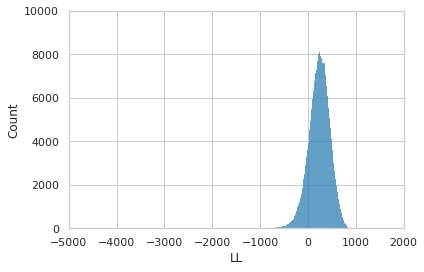

In [7]:
ax = sns.histplot(data=llc_table, x='LL')
ax.set_xlim(-5000., 2000.)
ax.set_ylim(0., 10000.)